# ASSIGNMENT 2
SUBMITTED BY - SHIVANI GOYAL<BR>
R00183301

## Importing Libraries and Install Packages

In [95]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.pipeline import Pipeline
from sklearn import metrics, model_selection
from sklearn import neighbors
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import (SMOTE, BorderlineSMOTE, SVMSMOTE, KMeansSMOTE)
import warnings
# Code to ignore the future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [96]:
# Reading File into data frame
data = pd.read_csv("Breast_cancer_data.csv")
data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [97]:
# this will describe the all statistical function of our data
data.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [98]:
data['mean_radius']

0      17.99
1      20.57
2      19.69
3      11.42
4      20.29
       ...  
564    21.56
565    20.13
566    16.60
567    20.60
568     7.76
Name: mean_radius, Length: 569, dtype: float64

In [99]:
#displays the count of diagnosis
data.diagnosis.value_counts()
#357 benign and 212 malignant

1    357
0    212
Name: diagnosis, dtype: int64

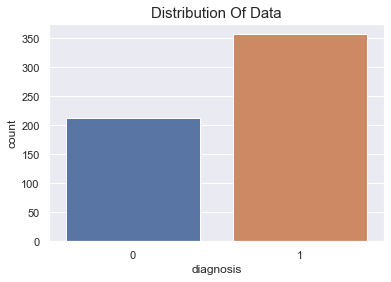

In [100]:
# plots the barplot of distribution of data
sns.set(style="darkgrid")
sns.countplot(data['diagnosis'],label="Count")
plt.title('Distribution Of Data', fontsize = 15)
plt.show()

Here, we observes that the dataset is imbalanced. As 63% of total data belongs to 'benign' class of diagnosis and the remaining 37% of total dataset to 'malignant' class.

In [101]:
# Splitting the features & target
features = data.iloc[:, :-1]
target = data.diagnosis
print("The fetures of the data are: \n",features,"\n\n The Target of the data are: \n", target)

The fetures of the data are: 
      mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness
0          17.99         10.38          122.80     1001.0          0.11840
1          20.57         17.77          132.90     1326.0          0.08474
2          19.69         21.25          130.00     1203.0          0.10960
3          11.42         20.38           77.58      386.1          0.14250
4          20.29         14.34          135.10     1297.0          0.10030
..           ...           ...             ...        ...              ...
564        21.56         22.39          142.00     1479.0          0.11100
565        20.13         28.25          131.20     1261.0          0.09780
566        16.60         28.08          108.30      858.1          0.08455
567        20.60         29.33          140.10     1265.0          0.11780
568         7.76         24.54           47.92      181.0          0.05263

[569 rows x 5 columns] 

 The Target of the data are: 
 0      0
1  

In [102]:
type(features)

pandas.core.frame.DataFrame

## Data Pre Preprocessing

This includes following steps: <br/><br/>
1) Dealing with outliers <br/>
2) Dealing with missing values <br/>
3) Handling categorical data <br/>
4) Scaling data <br/>
5) Handling imbalance <br/>
6) Feature selection <br/>
7) Dimensionality reduction <br/>

In [103]:
#gives the number of null values
data.isna().sum()
# no null values found

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [104]:
# to remove duplicate rows
data.drop_duplicates(inplace = True)
data.diagnosis.value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

Here, we observe that data has no duplicate rows as the value counts for data is same as it was before.

<b>Handling Categorical Data</b>: As the dataset have only numeric values, don't have to handle categorical data.

Text(0.5, 1.0, 'Visualising Outliers')

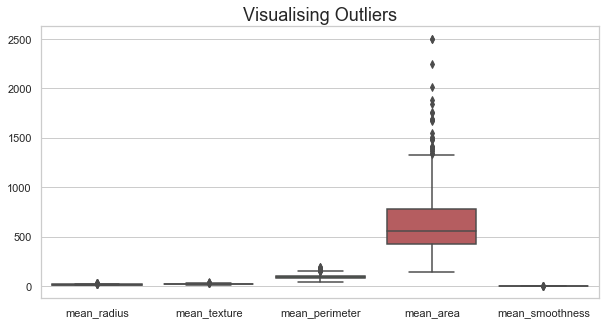

In [105]:
#Detecting the outliers by plotting boxplot for the features in the Dataset
sns.set_style("whitegrid") 
fig, ax = plt.subplots(1,figsize = (10, 5))
sns.boxplot(data=pd.DataFrame(features), ax = ax)
ax.set_title('Visualising Outliers', fontsize = 18)

<b>OBSERVATIONS</b><br/> 
Here, we observe that outliers are present but doesn't seems to be potential outliers as these are clustered. Removing these outliers would lead to the loss of important data. So, here not imparting these outliers from the data. 

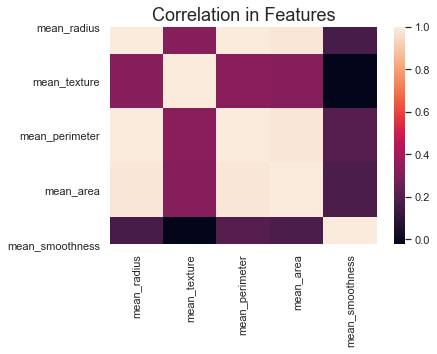

In [106]:
# Finding Correlation for Feature Selection
corr = features.corr()
sns.heatmap(corr).set_title("Correlation in Features", fontsize = 18)
plt.show()

Here, mean_radius, mean_perimeter and mean_area are highly correlated. We can’t reduce our feature space to just three features. Hence, we are not extracting these features for classification.

In [107]:
# Scaling Data: By using standardization technique
scaler = preprocessing.StandardScaler()
features = scaler.fit_transform(features)
print(features)

[[ 1.09706398 -2.07333501  1.26993369  0.9843749   1.56846633]
 [ 1.82982061 -0.35363241  1.68595471  1.90870825 -0.82696245]
 [ 1.57988811  0.45618695  1.56650313  1.55888363  0.94221044]
 ...
 [ 0.70228425  2.0455738   0.67267578  0.57795264 -0.84048388]
 [ 1.83834103  2.33645719  1.98252415  1.73521799  1.52576706]
 [-1.80840125  1.22179204 -1.81438851 -1.34778924 -3.11208479]]


In [108]:
type(features)

numpy.ndarray

In [109]:
# Stratified Cross Fold Validation, here I have chose k(no. of splits) = 10
skf = model_selection.StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

In [110]:
# Dictionary to store the scores for each model, initialized with empty list to store values for each iteration for each algorithm
model_score_dict = {'knn': [], 'LogReg': [], 'nb': [], 'svm': [], 'ab': [], 'gb': []}

In [111]:
# Splitting the data into train & test using Stratified K-Fold Cross Validation
for train_index, test_index in skf.split(features, target):

    # As our data is imbalance we are using SMOTE on training set to over-sample it
    sm = SMOTE(random_state=0)
    x_train, y_train = sm.fit_sample(features[train_index], target[train_index])

    ## Implementing 6 different Machine Algorithms:
    
    # KNN
    knn = neighbors.KNeighborsClassifier()
    knn.fit(x_train, y_train)
    res = knn.predict(features[test_index])
    model_score_dict['knn'].append(metrics.f1_score(res, target[test_index]))

    # Logistic Regression
    LogRegClf = LogisticRegression(random_state=0)
    LogRegClf.fit(x_train, y_train)
    res = LogRegClf.predict(features[test_index])
    model_score_dict['LogReg'].append(metrics.f1_score(res, target[test_index]))
    
    # Naive Bayes
    NBClf = GaussianNB()
    NBClf.fit(x_train, y_train)
    res = NBClf.predict(features[test_index])
    model_score_dict['nb'].append(metrics.f1_score(res, target[test_index]))
    
    # SVM
    SVMClf = SVC(gamma="auto", random_state=0)
    SVMClf.fit(x_train, y_train)
    res = SVMClf.predict(features[test_index])
    model_score_dict['svm'].append(metrics.f1_score(res, target[test_index]))
    
    # Ada Boost Classifier
    ABclf = AdaBoostClassifier(random_state=0)
    ABclf.fit(x_train, y_train)
    res = ABclf.predict(features[test_index])
    model_score_dict['ab'].append(metrics.f1_score(res, target[test_index]))
    
    # Gradient Boosting Classifier
    GBclf = GradientBoostingClassifier(random_state=0)
    GBclf.fit(x_train, y_train)
    res = GBclf.predict(features[test_index])
    model_score_dict['gb'].append(metrics.f1_score(res, target[test_index]))

# Taking mean across all the values through each iteration
score_mean_dict = {k: sum(v) / len(v) for k, v in model_score_dict.items()}

In [112]:
# Print All Algorithms with their Score
for k, v in score_mean_dict.items():
    print("Algorithm:", k, "F1 Score (Averaged over iterations):", v)

Algorithm: knn F1 Score (Averaged over iterations): 0.9358682957533271
Algorithm: LogReg F1 Score (Averaged over iterations): 0.9419975341427163
Algorithm: nb F1 Score (Averaged over iterations): 0.9226048720155466
Algorithm: svm F1 Score (Averaged over iterations): 0.9425010775494298
Algorithm: ab F1 Score (Averaged over iterations): 0.9372528835862466
Algorithm: gb F1 Score (Averaged over iterations): 0.9322529894079189


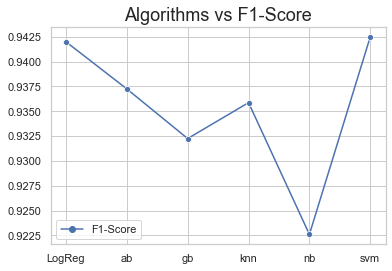

In [113]:
# Converting dictionary to DF 
# Plot depicts all 6 algorithms with their mean f1-score
score_df = pd.DataFrame.from_dict(score_mean_dict, orient='index', columns=['F1-Score'])
sns.lineplot(data=score_df, markers=True).set_title("Algorithms vs F1-Score", fontsize = 18)
plt.show()

In [114]:
# Sorting algorithm in descending order of values to get the top 3
top = sorted(score_mean_dict, key=score_mean_dict.get, reverse=True)[:3]
print("Top 3 Algorithms with highest accuracy:", top)

Top 3 Algorithms with highest accuracy: ['svm', 'LogReg', 'ab']


## HYPER-PARAMETRER OPTIMIZATION

In [115]:
#  Creating Smote object which is used to handle imbalance
sm = SMOTE(random_state=0)

1st Algorithm Hyperparameter tuning: Logistic Regression

In [116]:
logistic = LogisticRegression()

# Creating a dictionary of hyper parameters
hyperparameters_LR = {'model__C': np.logspace(0, 4, 10), 'model__penalty': ['l2']}

# Creating a pipeline of SMOTE and Logistic Regression Algorithm
pipeline_LR = Pipeline([('smt', sm), ('model', LogisticRegression())])

# Grid search using 10-fold cross validation
grid_LR = GridSearchCV(pipeline_LR, hyperparameters_LR, cv=10, verbose=0, scoring='f1')

# Fit grid search to get beat model
best_model_LR = grid_LR.fit(features, target)

# View best hyperparameters
print('Best Parameters:',grid_LR.best_params_) #best_model_LR.best_estimator_.get_params())
print('Best Score:', best_model_LR.best_score_)

Best Parameters: {'model__C': 166.81005372000593, 'model__penalty': 'l2'}
Best Score: 0.936814296031363


2nd Algorithm HyperParameter Tuning: Ada Boosting

In [117]:
# Ada Boosting

ada_boost = AdaBoostClassifier()

# Creating a dictionary of hyper parameters, where keys: the parameters & values: the range of values to experiment with
hyperparameters_AB = {'model__n_estimators': list(range(50, 101)), 'model__learning_rate': [0.1, 0.3, 0.5, 0.7, 0.9, 1]}

# Creating a pipeline of SMOTE and Algorithm
pipeline_AB = Pipeline([('smt', sm), ('model', ada_boost)])

# Create grid search using 10-fold cross validation
grid_AB = GridSearchCV(pipeline_AB, hyperparameters_AB, cv=10, verbose=0, scoring='f1', n_jobs=-1)

# Fit grid search to get best model
best_model_AB = grid_AB.fit(features, target)

print('Best Parameters:', grid_AB.best_params_)
print('Best Score:', best_model_AB.best_score_)

Best Parameters: {'model__learning_rate': 1, 'model__n_estimators': 100}
Best Score: 0.9434503977016261


3rd Algorithm HyperParameter Tuning: Gradient Boosting

In [118]:
# Gradient Boosting

grad_boost = GradientBoostingClassifier()

# Creating a dictionary of hyper parameters, where keys: the parameters & values: the range of values to experiment with
hyperparameters_GB = {'model__n_estimators': list(range(100, 200)), 'model__learning_rate': [0.01, 0.03, 0.05, 0.07, 0.09, .1], 'model__max_depth': [1, 3, 5, 7, 9], 'model__random_state': 0}

# Creating a pipeline of SMOTE and Algorithm
pipeline_GB = Pipeline([('smt', sm), ('model', grad_boost)])

# Create grid search using 10-fold cross validation
grid_GB = GridSearchCV(pipeline_GB, hyperparameters_AB, cv=10, verbose=0, scoring='f1', n_jobs=-1)

# Fit grid search to get best model
best_model_GB = grid_GB.fit(features, target)

print('Best Parameters:', grid_GB.best_params_)
print('Best Score:', best_model_GB.best_score_)

Best Parameters: {'model__learning_rate': 0.7, 'model__n_estimators': 51}
Best Score: 0.936993382615535


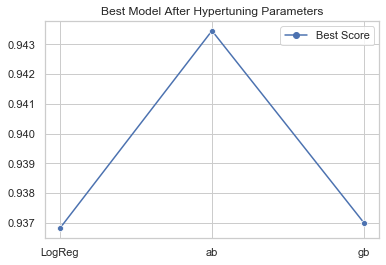

In [119]:
# Creating dictionary of algos with their best scores 
model_score_afterhp_dict = {'LogReg': [best_model_LR.best_score_] ,'ab': [best_model_AB.best_score_], 'gb': [best_model_GB.best_score_]}
model_score_afterhp_dict

#Converting it into dataframe
afterhpmodel_df = pd.DataFrame.from_dict(model_score_afterhp_dict, orient='index', columns=['Best Score'])
afterhpmodel_df

#Plotting line graph 
sns.lineplot(data=afterhpmodel_df, markers=True).set_title("Best Model After Hypertuning Parameters")
plt.show()

In [120]:
# Print All Algorithms with their Score
for k, v in model_score_afterhp_dict.items():
    print("Algorithm:", k, "Best Score:", v)

Algorithm: LogReg Best Score: [0.936814296031363]
Algorithm: ab Best Score: [0.9434503977016261]
Algorithm: gb Best Score: [0.936993382615535]


## RESEARCH: Handling Imbalance Data

In [121]:
# Making Object of Stratified K Fold
skf = model_selection.StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

In [122]:
# Creating dictionaries to store Scores
bl_smote_scores = {'LR': 0, 'AB': 0, 'GB': 0}
bl_smote_con_mat = {'LR': [[0, 0], [0, 0]], 'AB': [[0, 0], [0, 0]], 'GB': [[0, 0], [0, 0]]}

km_scores = {'LR': 0, 'AB': 0, 'GB': 0}
km_con_mat = {'LR': [[0, 0], [0, 0]], 'AB': [[0, 0], [0, 0]], 'GB': [[0, 0], [0, 0]]}

svm_sm_scores = {'LR': 0, 'AB': 0, 'GB': 0}
svm_sm_con_mat = {'LR': [[0, 0], [0, 0]], 'AB': [[0, 0], [0, 0]], 'GB': [[0, 0], [0, 0]]}


In [123]:
for train_index, test_index in skf.split(features, target):

    ##1. Borderline Smote 
    bl_smote = BorderlineSMOTE(random_state=0, kind='borderline-1')
    X_train, y_train = bl_smote.fit_sample(features[train_index], target[train_index])

    
    # Logistic Regression
    logistic = LogisticRegression(random_state=0)
    logistic.fit(X_train, y_train)
    res = logistic.predict(features[test_index])
    bl_smote_scores['LR'] += metrics.f1_score(res, target[test_index])
    bl_smote_con_mat['LR'] += confusion_matrix(y_true=target[test_index], y_pred=res)

    
    # Ada Boost Classifier
    adaBoost = AdaBoostClassifier(random_state=0)
    adaBoost.fit(X_train, y_train)
    res = adaBoost.predict(features[test_index])
    bl_smote_scores['AB'] += metrics.f1_score(res, target[test_index])
    bl_smote_con_mat['AB'] += confusion_matrix(y_true=target[test_index], y_pred=res)

    
    # Gradient Boost Classifier
    gradBoost = GradientBoostingClassifier(random_state=0)
    gradBoost.fit(X_train, y_train)
    res = gradBoost.predict(features[test_index])
    bl_smote_scores['GB'] += metrics.f1_score(res, target[test_index])
    bl_smote_con_mat['GB'] += confusion_matrix(y_true=target[test_index], y_pred=res)

    
    ##2. K-Means Smote
    km_smote = KMeansSMOTE(random_state=0)
    X_train, y_train = km_smote.fit_sample(features[train_index], target[train_index])

    # Logistic Regression
    logistic = LogisticRegression(random_state=0)
    logistic.fit(X_train, y_train)
    res = logistic.predict(features[test_index])
    km_scores['LR'] += metrics.f1_score(res, target[test_index])
    km_con_mat['LR'] += confusion_matrix(y_true=target[test_index], y_pred=res)
    
    # Ada Boost Classifier
    adaBoost = AdaBoostClassifier(random_state=0)
    adaBoost.fit(X_train, y_train)
    res = adaBoost.predict(features[test_index])
    km_scores['AB'] += metrics.f1_score(res, target[test_index])
    km_con_mat['AB'] += confusion_matrix(y_true=target[test_index], y_pred=res)

    # Gradient Boost Classifier
    gradBoost = GradientBoostingClassifier(random_state=0)
    gradBoost.fit(X_train, y_train)
    res = gradBoost.predict(features[test_index])
    km_scores['GB'] += metrics.f1_score(res, target[test_index])
    km_con_mat['GB'] += confusion_matrix(y_true=target[test_index], y_pred=res)

    ##3. SVM Smote
    svm_smote = SVMSMOTE(random_state=0)
    X_train, y_train = svm_smote.fit_sample(features[train_index], target[train_index])

    # Logistic Regression
    logistic = LogisticRegression(random_state=0)
    logistic.fit(X_train, y_train)
    res = logistic.predict(features[test_index])
    svm_sm_scores['LR'] += metrics.f1_score(res, target[test_index])
    svm_sm_con_mat['LR'] += confusion_matrix(y_true=target[test_index], y_pred=res)

    # Ada Boost Classifier
    adaBoost = AdaBoostClassifier(random_state=0)
    adaBoost.fit(X_train, y_train)
    res = adaBoost.predict(features[test_index])
    svm_sm_scores['AB'] += metrics.f1_score(res, target[test_index])
    svm_sm_con_mat['AB'] += confusion_matrix(y_true=target[test_index], y_pred=res)

    # Gradient Boost Classifier
    gradBoost = GradientBoostingClassifier(random_state=0)
    gradBoost.fit(X_train, y_train)
    res = gradBoost.predict(features[test_index])
    svm_sm_scores['GB'] += metrics.f1_score(res, target[test_index])
    svm_sm_con_mat['GB'] += confusion_matrix(y_true=target[test_index], y_pred=res)

bl_smote_scores = {k: v / 10 for k, v in bl_smote_scores.items()}
bl_smote_con_mat = {k: v for k, v in bl_smote_con_mat.items()}

km_scores = {k: v / 10 for k, v in km_scores.items()}
km_con_mat = {k: v / 10 for k, v in km_con_mat.items()}

svm_sm_scores = {k: v / 10 for k, v in svm_sm_scores.items()}
svm_sm_con_mat = {k: v / 10 for k, v in svm_sm_con_mat.items()}


Borderline Smote Score: {'LR': 0.9203746929876175, 'AB': 0.9253930758629378, 'GB': 0.9195425526698298}
Borderline Smote Con Mat Score
: {'LR': array([[200,  12],
       [ 42, 315]], dtype=int64), 'AB': array([[193,  19],
       [ 33, 324]], dtype=int64), 'GB': array([[191,  21],
       [ 35, 322]], dtype=int64)}


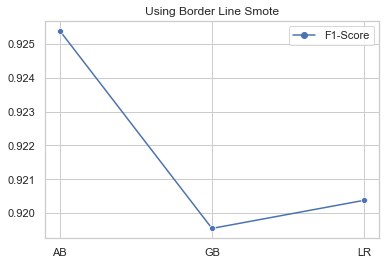

In [124]:
#Displays the model with their respective score after borderline smote

print("Borderline Smote Score:", bl_smote_scores)
print("Borderline Smote Con Mat Score\n:", bl_smote_con_mat)

bl_smote_df = pd.DataFrame.from_dict(bl_smote_scores, orient='index', columns=['F1-Score'])
sns.lineplot(data=bl_smote_df, markers=True).set_title("Using Border Line Smote")
plt.show()

K Means Smote Score: {'LR': 0.9457136242110197, 'AB': 0.9365813418689568, 'GB': 0.9347776898208948}
K Means Smote Con Mat Score:
 {'LR': array([[19. ,  2.2],
       [ 1.7, 34. ]]), 'AB': array([[18.4,  2.8],
       [ 1.8, 33.9]]), 'GB': array([[18.5,  2.7],
       [ 2. , 33.7]])}


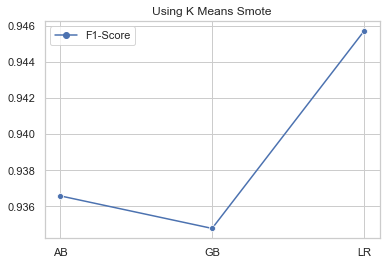

In [125]:
#Displays the model with their respective score after K- Means smote

print("K Means Smote Score:", km_scores)
print("K Means Smote Con Mat Score:\n", km_con_mat)
km_df = pd.DataFrame.from_dict(km_scores, orient='index', columns=['F1-Score'])
sns.lineplot(data=km_df, markers=True).set_title("Using K Means Smote")
plt.show()

SVM Smote Score: {'LR': 0.9266442503061499, 'AB': 0.9271979901387724, 'GB': 0.9251517571572266}
SVM Smote Con Mat Score:
 {'LR': array([[20. ,  1.2],
       [ 3.8, 31.9]]), 'AB': array([[19.5,  1.7],
       [ 3.3, 32.4]]), 'GB': array([[19.3,  1.9],
       [ 3.3, 32.4]])}


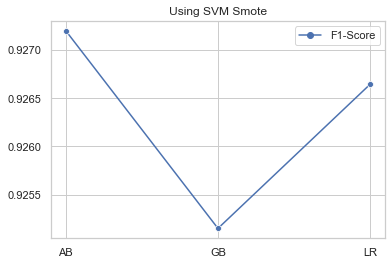

In [126]:
print("SVM Smote Score:", svm_sm_scores)
print("SVM Smote Con Mat Score:\n", svm_sm_con_mat)
svm_sm_df = pd.DataFrame.from_dict(svm_sm_scores, orient='index', columns=['F1-Score'])
sns.lineplot(data=svm_sm_df, markers=True).set_title("Using SVM Smote")
plt.show()

<b>Hyper Parameter Optimization with SMOTE Variants</b> <br><br>
1. Borderline Smote

Appling Borderline Smote on Logistic Regression:-

In [127]:
logistic = LogisticRegression()
bl_smote = BorderlineSMOTE(random_state=0, kind='borderline-1')

# Creating a dictionary of hyper parameters,
hyperparameters_LR = {'model__C': np.logspace(0, 4, 10), 'model__penalty': ['l2']}

# Creating a pipeline of SMOTE and Algorithm,
pipeline_LR = Pipeline([('smt', bl_smote), ('model', LogisticRegression())])

# Create grid search using 10-fold cross validation,
grid_LR = GridSearchCV(pipeline_LR, hyperparameters_LR, cv=10, verbose=0, scoring='f1')

# Fit grid search to get beat model
best_model_LR1 = grid_LR.fit(features, target)

# View best hyperparameters
print('Best Parameters:', grid_LR.best_params_)
print('Best Score:', best_model_LR1.best_score_)

Best Parameters: {'model__C': 3593.813663804626, 'model__penalty': 'l2'}
Best Score: 0.9304289111310375


Appling Borderline Smote on Ada Boosting:-

In [128]:
ada_boost = AdaBoostClassifier()
bl_smote = BorderlineSMOTE(random_state=0, kind='borderline-1')

# Creating a dictionary of hyper parameters,
hyperparameters_AB = {'model__n_estimators': list(range(50, 101)), 'model__learning_rate': [0.1, 0.3, 0.5, 0.7, 0.9, 1]}

# Creating a pipeline of SMOTE and Algorithm
pipeline_AB = Pipeline([('smt', bl_smote), ('model', ada_boost)])

# Create grid search using 10-fold cross validation
grid_AB = GridSearchCV(pipeline_AB, hyperparameters_AB, cv=10, verbose=0, scoring='f1', n_jobs=-1)

# Fit grid search to get best model
best_model_AB1 = grid_AB.fit(features, target)
print('Best Parameters:', grid_AB.best_params_)
print('Best Score:', best_model_AB1.best_score_)

Best Parameters: {'model__learning_rate': 1, 'model__n_estimators': 78}
Best Score: 0.9266648242526566


Appling Borderline Smote on Gradient Boosting:-

In [129]:
grad_boost = GradientBoostingClassifier()

bl_smote = BorderlineSMOTE(random_state=0, kind='borderline-1')

# Creating a dictionary of hyper parameters, 
hyperparameters_GB = {'model__n_estimators': list(range(100, 200)), 'model__learning_rate': [0.01, 0.03, 0.05, 0.07, 0.09, .1], 'model__max_depth': [1, 3, 5, 7, 9], 'model__random_state': 0}

# Creating a pipeline of SMOTE and Algorithm
pipeline_GB = Pipeline([('smt', bl_smote), ('model', grad_boost)])

# Create grid search using 10-fold cross validation
grid_GB = GridSearchCV(pipeline_GB, hyperparameters_AB, cv=10, verbose=0, scoring='f1', n_jobs=-1)

# Fit grid search to get best model
best_model_GB1 = grid_GB.fit(features, target)
print('Best Parameters:',grid_GB.best_params_)
print('Best Score:', best_model_GB1.best_score_)

Best Parameters: {'model__learning_rate': 1, 'model__n_estimators': 85}
Best Score: 0.9330311720529112


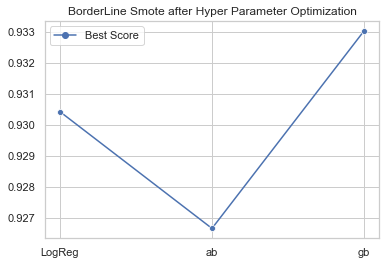

In [130]:
# Creating dictionary of algos with their best scores 
model_score_blsm_dict = {'LogReg': [best_model_LR1.best_score_] ,'ab': [best_model_AB1.best_score_], 'gb': [best_model_GB1.best_score_]}
model_score_blsm_dict

#Converting it into dataframe
blsm_model_df = pd.DataFrame.from_dict(model_score_blsm_dict, orient='index', columns=['Best Score'])
blsm_model_df

#Plotting line graph 
sns.lineplot(data=blsm_model_df, markers=True).set_title("BorderLine Smote after Hyper Parameter Optimization")
plt.show()

2. K-Means Smote

Appling K Means Smote on Logistic Regression :-

In [131]:
logistic = LogisticRegression()
km_smote = KMeansSMOTE(random_state=0)

# Creating a dictionary of hyper parameters,
hyperparameters_LR = {'model__C': np.logspace(0, 4, 10), 'model__penalty': ['l2']}

# Creating a pipeline of SMOTE and Algorithm
pipeline_LR = Pipeline([('smt', km_smote), ('model', LogisticRegression())])

# Create grid search using 10-fold cross validation
grid_LR = GridSearchCV(pipeline_LR, hyperparameters_LR, cv=10, verbose=0, scoring='f1')

# Fit grid search to get best model
best_model_LR2 = grid_LR.fit(features, target)

# View best hyperparameters
print('Best Parameters:',grid_LR.best_params_)
print('Best Score:', best_model_LR2.best_score_)


Best Parameters: {'model__C': 21.544346900318832, 'model__penalty': 'l2'}
Best Score: 0.9420729559682017


Appling K Means Smote on Ada Boosting:-

In [132]:
ada_boost = AdaBoostClassifier()
km_smote = KMeansSMOTE(random_state=0)

# Creating a dictionary of hyper parameters, 
hyperparameters_AB = {'model__n_estimators': list(range(50, 101)), 'model__learning_rate': [0.1, 0.3, 0.5, 0.7, 0.9, 1]}

# Creating a pipeline of SMOTE and Algorithm
pipeline_AB = Pipeline([('smt', km_smote), ('model', ada_boost)])

# Create grid search using 10-fold cross validation
grid_AB = GridSearchCV(pipeline_AB, hyperparameters_AB, cv=10, verbose=0, scoring='f1', n_jobs=-1)

# Fit grid search to get best model
best_model_AB2 = grid_AB.fit(features, target)
print('Best Parameters:',grid_AB.best_params_)
print('Best Score:', best_model_AB2.best_score_)

Best Parameters: {'model__learning_rate': 0.7, 'model__n_estimators': 67}
Best Score: 0.9525283023879447


Appling K Means Smote on Gradient Boosting:-

In [133]:
grad_boost = GradientBoostingClassifier()
km_smote = KMeansSMOTE(random_state=0)

# Creating a dictionary of hyper parameters,
hyperparameters_GB = {'model__n_estimators': list(range(100, 200)), 'model__learning_rate': [0.01, 0.03, 0.05, 0.07, 0.09, .1], 'model__max_depth': [1, 3, 5, 7, 9]}

# Creating a pipeline of SMOTE and Algorithm
pipeline_GB = Pipeline([('smt', km_smote), ('model', grad_boost)])

# Create grid search using 10-fold cross validation
grid_GB = GridSearchCV(pipeline_GB, hyperparameters_AB, cv=10, verbose=0, scoring='f1', n_jobs=-1)

# Fit grid search to get best model
best_model_GB2 = grid_GB.fit(features, target)
print('Best Parameters:', grid_GB.best_params_)
print('Best Score:', best_model_GB2.best_score_)

Best Parameters: {'model__learning_rate': 0.7, 'model__n_estimators': 89}
Best Score: 0.9445954538583301


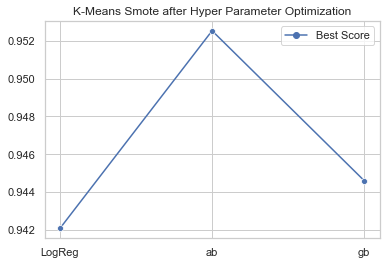

In [134]:
# Creating dictionary of algos with their best scores 
model_score_Kmeans_dict = {'LogReg': [best_model_LR2.best_score_] ,'ab': [best_model_AB2.best_score_], 'gb': [best_model_GB2.best_score_]}
model_score_Kmeans_dict

#Converting it into dataframe
Kmeans_model_df = pd.DataFrame.from_dict(model_score_Kmeans_dict, orient='index', columns=['Best Score'])
Kmeans_model_df

#Plotting line graph 
sns.lineplot(data=Kmeans_model_df, markers=True).set_title("K-Means Smote after Hyper Parameter Optimization")
plt.show()

3. SVM SMOTE

Appling SVM Smote on Logistic Regression:-

In [135]:
logistic = LogisticRegression()
svm_smote = SVMSMOTE(random_state=0)

# Creating a dictionary of hyper parameters,
hyperparameters_LR = {'model__C': np.logspace(0, 4, 10), 'model__penalty': ['l2']}

# Creating a pipeline of SMOTE and Algorithm
pipeline_LR = Pipeline([('smt', svm_smote), ('model', LogisticRegression())])

# Create grid search using 10-fold cross validation
grid_LR = GridSearchCV(pipeline_LR, hyperparameters_LR, cv=10, verbose=0, scoring='f1')

# Fit grid search to get beat model
best_model_LR3 = grid_LR.fit(features, target)

# View best hyperparameters
print('Best Parameters:',grid_LR.best_params_)
print('Best Score:', best_model_LR3.best_score_)

Best Parameters: {'model__C': 464.15888336127773, 'model__penalty': 'l2'}
Best Score: 0.9300975087492663


Appling SVM Smote on Ada Boosting :-

In [136]:

ada_boost = AdaBoostClassifier()
svm_smote = SVMSMOTE(random_state=0)

# Creating a dictionary of hyper parameters, where keys: the parameters & values: the range of values to experiment with
hyperparameters_AB = {'model__n_estimators': list(range(50, 101)), 'model__learning_rate': [0.1, 0.3, 0.5, 0.7, 0.9, 1]}

# Creating a pipeline of SMOTE and Algorithm
pipeline_AB = Pipeline([('smt', svm_smote), ('model', ada_boost)])

# Create grid search using 10-fold cross validation
grid_AB = GridSearchCV(pipeline_AB, hyperparameters_AB, cv=10, verbose=0, scoring='f1', n_jobs=-1)

# Fit grid search to get best model
best_model_AB3 = grid_AB.fit(features, target)
print('Best Parameters:',grid_AB.best_params_)
print('Best Score:', best_model_AB3.best_score_)

Best Parameters: {'model__learning_rate': 0.1, 'model__n_estimators': 92}
Best Score: 0.936262439134136


Appling SVM Smote on Gradient Boosting :-

In [137]:
grad_boost = GradientBoostingClassifier()
svm_smote = SVMSMOTE(random_state=0)

# Creating a dictionary of hyper parameters, where keys: the parameters & values: the range of values to experiment with
hyperparameters_GB = {'model__n_estimators': list(range(100, 200)), 'model__learning_rate': [0.01, 0.03, 0.05, 0.07, 0.09, .1], 'model__max_depth': [1, 3, 5, 7, 9], 'model__random_state': 0}

# Creating a pipeline of SMOTE and Algorithm
pipeline_GB = Pipeline([('smt', svm_smote), ('model', grad_boost)])

# Create grid search using 10-fold cross validation
grid_GB = GridSearchCV(pipeline_GB, hyperparameters_AB, cv=10, verbose=0, scoring='f1', n_jobs=-1)

# Fit grid search to get best model
best_model_GB3 = grid_GB.fit(features, target)
print('Best Parameters:',grid_GB.best_params_)
print('Best Score:', best_model_GB3.best_score_)


Best Parameters: {'model__learning_rate': 1, 'model__n_estimators': 77}
Best Score: 0.9324508550120939


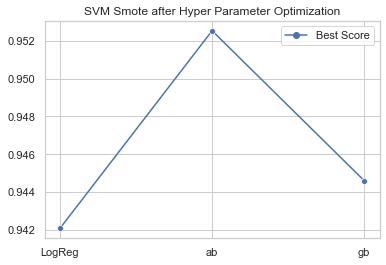

In [138]:
# Creating dictionary of algos with their best scores 
model_score_svm_dict = {'LogReg': [best_model_LR3.best_score_] ,'ab': [best_model_AB3.best_score_], 'gb': [best_model_GB3.best_score_]}
model_score_svm_dict

#Converting it into dataframe
svm_model_df = pd.DataFrame.from_dict(model_score_Kmeans_dict, orient='index', columns=['Best Score'])
svm_model_df

#Plotting line graph 
sns.lineplot(data=svm_model_df, markers=True).set_title("SVM Smote after Hyper Parameter Optimization")
plt.show()